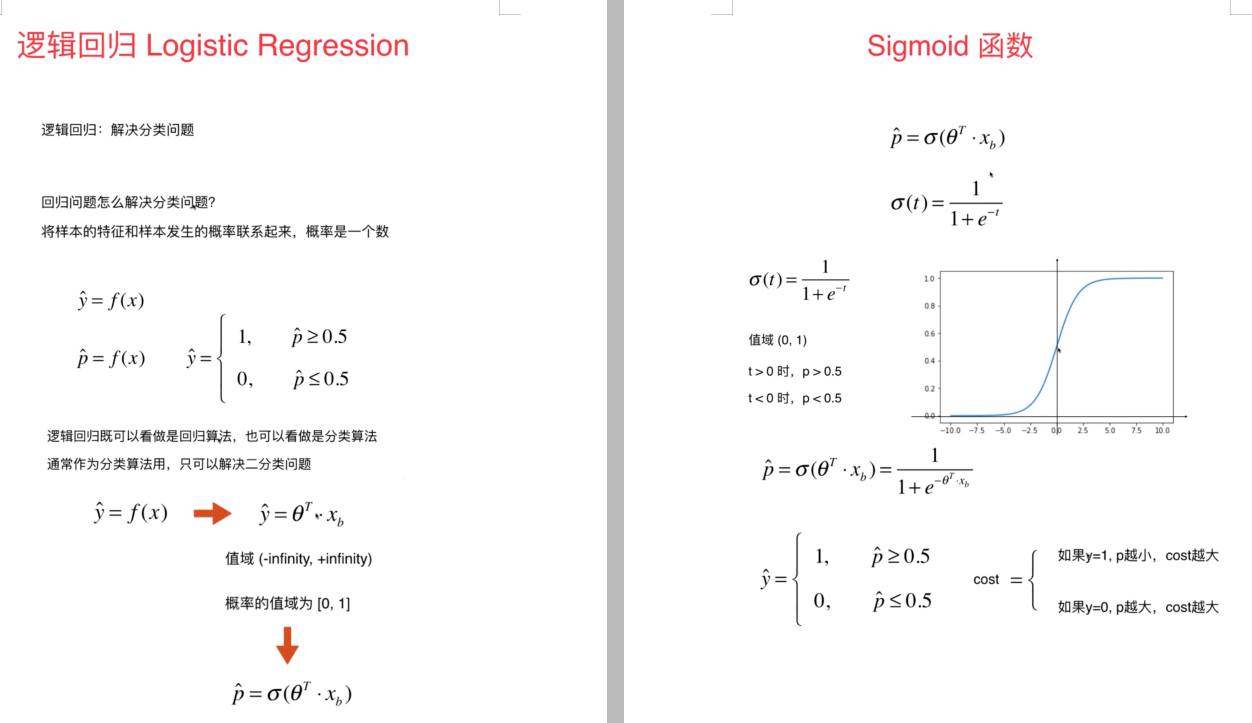

In [1]:
from IPython.display import Image
Image(filename=r"image/x1.png")

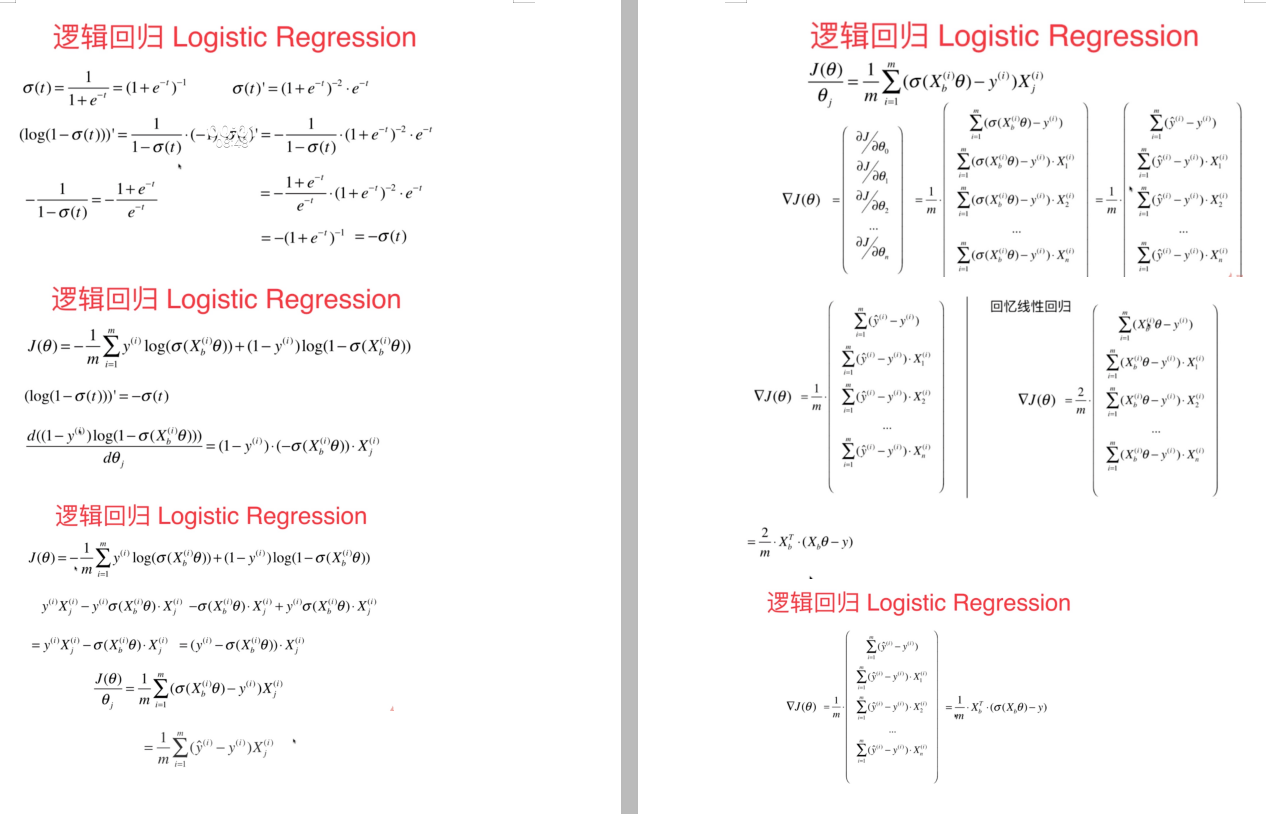

In [2]:
from IPython.display import Image
Image(filename=r"image/x2.png")

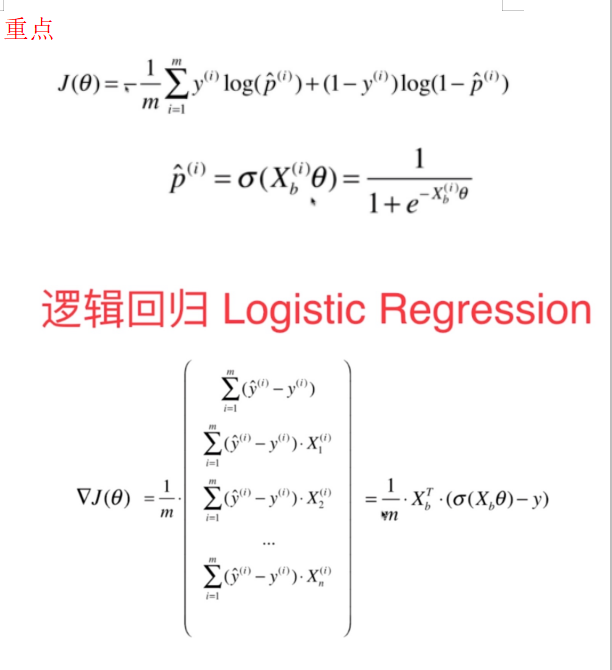

In [3]:
from IPython.display import Image
Image(filename=r"image/x3.png")

## Sigmoid函数

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

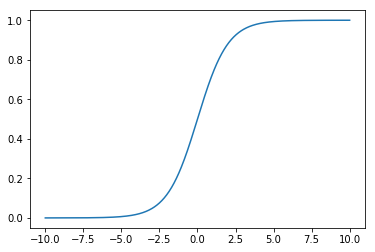

In [6]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)

plt.plot(x, y)

### 使用鸢尾花示例测试自己写的逻辑回归

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [8]:
X = iris.data
y = iris.target

In [9]:
# 只选择两个特征
X = X[y<2, :2] # 选择前两行
y = y[y<2]

In [10]:
X.shape

(100, 2)

In [11]:
y.shape

(100,)

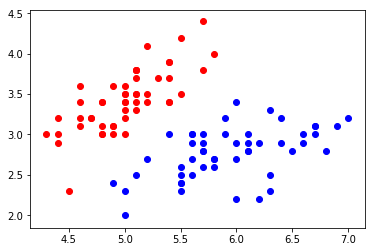

In [12]:
plt.scatter(X[y==0,0], X[y==0,1], color="r")
plt.scatter(X[y==1,0], X[y==1,1], color="b")

#### 使用逻辑回归

In [13]:
%run C:\Learning\jupyter-notebook\ml\playML\model_selection
%run C:\Learning\jupyter-notebook\ml\playML\LogisticRegression

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [16]:
log_reg.score(X_test, y_test)

1.0

In [17]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [18]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [19]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## 决策边界

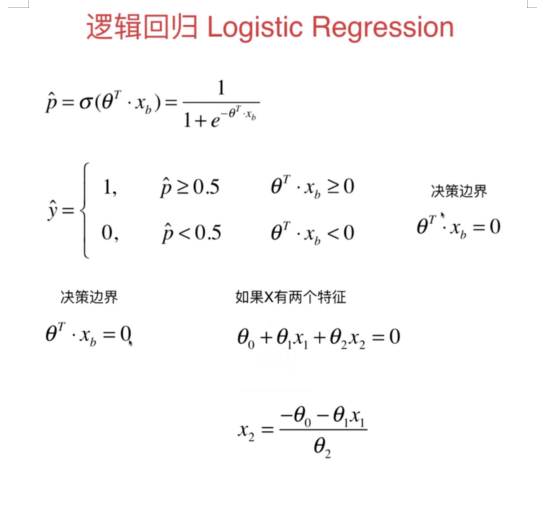

In [20]:
from IPython.display import Image
Image(filename=r"image/x4.png")

In [21]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [22]:
log_reg.interception_

-0.6937719272911224

In [23]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [24]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

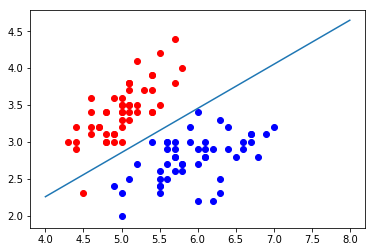

In [25]:
plt.scatter(X[y==0,0], X[y==0,1], color="r")
plt.scatter(X[y==1,0], X[y==1,1], color="b")
plt.plot(x1_plot, x2_plot)

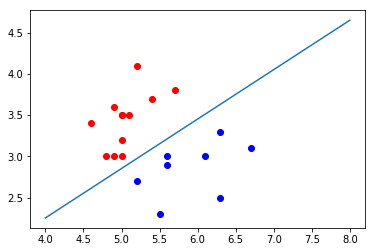

In [26]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="r")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="b")
plt.plot(x1_plot, x2_plot)

In [27]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


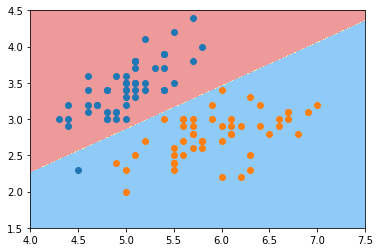

In [28]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5,4.5])
plt.scatter(X[y==0,0], X[y==0,1])                                       
plt.scatter(X[y==1,0], X[y==1,1])                                                                              

## KNN的决策边界

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
knn_clf.score(X_test, y_test)

1.0

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


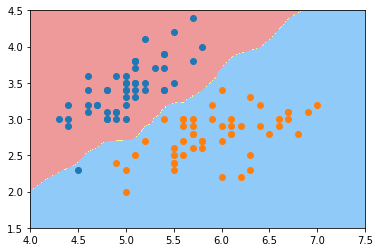

In [32]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5,4.5])
plt.scatter(X[y==0,0], X[y==0,1])                                       
plt.scatter(X[y==1,0], X[y==1,1])  

In [34]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


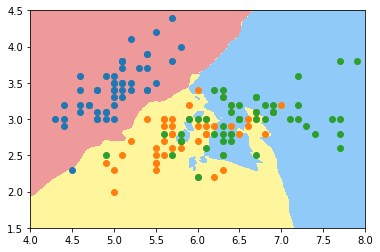

In [36]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5,4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])

In [37]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


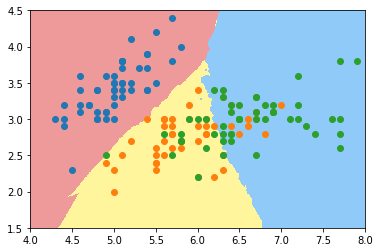

In [38]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5,4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])